# Análisis de Datos del Dataset Monopoly

# Fase 1: Entendiendo el Negocio

Contexto: El análisis se centra en comprender el comportamiento financiero de los clientes de Monopoly, utilizando un enfoque en la predicción de su facturación futura (Fac_T12). Este dato es clave para evaluar cuánto dinero un cliente generará en ingresos para la empresa a través del uso de productos financieros como tarjetas de crédito (TC) y débito (TD). La facturación refleja los montos totales gastados por los clientes en transacciones nacionales, internacionales, y avances de crédito, proporcionando una visión integral de su valor para la organización.

Objetivos:

1. Identificar los factores que influyen en la facturación, como la renta, la antigüedad y la actividad transaccional del cliente.

2. Desarrollar un modelo predictivo que permita estimar la facturación futura de los clientes, basado en patrones históricos.

3. Segmentar a los clientes según su valor financiero proyectado, enfocándose en aquellos con mayor potencial de facturación.

4. Proporcionar información que permita a la empresa diseñar estrategias personalizadas para retención y maximización de ingresos.

Importancia: La predicción de la facturación no solo permite anticipar flujos de ingresos, sino también optimizar recursos al focalizar esfuerzos en clientes de alto valor. Esto ayuda a mejorar la fidelización y aumentar el retorno de inversión en campañas de marketing y promociones.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("C:/Users/victo/OneDrive/Escritorio/monopoly/monopoly/monopoly/data/01_raw/Base_clientes_Monopoly_actualizado-0.xlsx", engine='openpyxl')

In [3]:
dfo = df.copy()

## Fase 2: Exploración Inicial del Dataset

Revisaremos la estructura del dataset, los primeros registros y las estadísticas generales. Incluiremos visualizaciones para variables clave.

muestra el número total de filas y columnas del dataset en formato (filas, columnas).

In [4]:
print(f'Dimensiones del dataset: {df.shape}')

Dimensiones del dataset: (51124, 574)


Entrega los nombres de las columnas 

In [5]:
print(f'Nombre de las columnas: {df.columns.tolist()}')

Nombre de las columnas: ['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad', 'Internauta', 'Adicional', 'Dualidad', 'Monoproducto', 'Ctacte', 'Consumo', 'Hipotecario', 'Debito', 'CambioPin', 'Cuentas', 'TC', 'CUPO_L1', 'CUPO_L2', 'CUPO_MX', 'FlgAct_T12', 'FlgActCN_T12', 'FlgActCI_T12', 'FlgActAN_T12', 'FlgActAI_T12', 'FlgActPAT_T12', 'FlgActCCPC_T12', 'FlgActCCOT_T12', 'FlgActCOL_T12', 'Fac_T12', 'Txs_T12', 'FacCN_T12', 'TxsCN_T12', 'FacCI_T12', 'TxsCI_T12', 'FacAN_T12', 'TxsAN_T12', 'FacAI_T12', 'TxsAI_T12', 'FacPAT_T12', 'TxsPAT_T12', 'FacCCPC_T12', 'TxsCCPC_T12', 'FacCCOT_T12', 'TxsCCOT_T12', 'FacCOL_T12', 'TxsCOL_T12', 'FacDebCom_T12', 'TxsDebCom_T12', 'FacDebAtm_T12', 'TxsDebAtm_T12', 'Col_T12', 'ColL1T0_T12', 'ColL1TE_T12', 'ColL2T0_T12', 'ColL2AC_T12', 'ColL2CC_T12', 'ColMx_T12', 'PagoNac_T12', 'PagoInt_T12', 'EeccNac_T12', 'EeccInt_T12', 'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12', 'IndRev_T12', 'FlgAct_T11', 'FlgActCN_T11', 'FlgActCI_T11', 'FlgActAN_T11', 'FlgActAI

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Columns: 574 entries, Id to target
dtypes: float64(508), int64(53), object(13)
memory usage: 223.9+ MB


Genera estadísticas descriptivas para todas las columnas, como promedio, mediana, valores mínimos y máximos (para numéricas), y conteos o valores únicos (para categóricas).

In [7]:
df.describe(include='all')

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
count,51124.000000,51124.000000,51123,51071.000000,51124.000000,3.775900e+04,51124.000000,51124.000000,51124.000000,51124.000000,...,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,51124.000000,5.112400e+04,5.112400e+04,51124.000000,51124,51124.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,NaN
freq,NaN,NaN,27410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38269,NaN
mean,25562.500000,182.024274,NaN,10.828220,38.702879,6.630771e+05,38.896154,0.684199,0.256181,0.381347,...,5.237914e+03,7.637553e+04,1.734930e+03,1.939488e+05,7.323155,1.840923e+05,1.360327e+05,8.294372,NaN,0.089977
std,14758.371918,29.276596,NaN,3.392703,13.302573,4.092795e+05,35.672549,0.464839,0.436527,0.485722,...,4.852871e+04,1.490256e+05,4.235368e+04,2.884980e+05,108.161194,2.891731e+05,4.325389e+05,113.215624,NaN,0.286152
min,1.000000,151.000000,NaN,1.000000,9.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,-1.861866e+06,-7886.760000,-3.763997e+06,-4.000000e+00,-7785.120000,NaN,0.000000
25%,12781.750000,160.000000,NaN,9.000000,28.000000,4.199990e+05,14.000000,0.000000,0.000000,0.000000,...,0.000000e+00,5.000000e+03,0.000000e+00,3.198100e+04,0.000000,1.770750e+04,0.000000e+00,0.000000,NaN,0.000000
50%,25562.500000,170.000000,NaN,13.000000,35.000000,5.670120e+05,25.000000,1.000000,0.000000,0.000000,...,0.000000e+00,3.400150e+04,0.000000e+00,9.223050e+04,0.000000,8.112900e+04,2.964650e+04,0.000000,NaN,0.000000
75%,38343.250000,210.000000,NaN,13.000000,46.000000,8.149035e+05,54.000000,1.000000,1.000000,1.000000,...,0.000000e+00,9.200000e+04,0.000000e+00,2.359780e+05,0.000000,2.278145e+05,1.021022e+05,0.000000,NaN,0.000000


 útil para inspeccionar rápidamente el tamaño del dataset.

In [8]:
df.shape

(51124, 574)

Muestra las primeras 30 filas del dataset para observar cómo están estructurados los datos iniciales.

In [9]:
df.head(30)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.00,33000,0.0,1099866.0,0.00,1099866.00,15080,0.00,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.00,300000,0.0,214592.0,0.00,214592.00,83596,0.00,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.00,216676,0.0,0.0,0.00,7400.00,0,0.00,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.00,60000,0.0,272762.0,0.00,272762.00,10591,0.00,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.00,272925,0.0,249562.0,0.00,75339.00,377782,0.00,R,0
5,6,170,H,13.0,47,707664.0,67,1,1,0,...,0.00,35800,0.0,35800.0,0.00,0.00,51197,0.00,R,0
6,7,811,H,13.0,48,1022833.0,21,1,0,1,...,0.00,9391,0.0,8818.0,0.00,8818.00,0,0.00,T,0
7,8,170,H,13.0,46,NaN,69,0,1,1,...,0.00,6000,0.0,283520.0,0.00,283520.00,0,0.00,R,0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,...,0.00,60000,0.0,507629.0,0.00,507629.00,0,0.00,R,1
9,10,170,M,13.0,44,964387.0,23,1,1,0,...,0.00,92583,0.0,65487.0,0.00,65487.00,12084,0.00,R,0


Muestra una lista con los nombres de todas las columnas en el dataset.


In [10]:
df.columns

Index(['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad',
       ...
       'ColMx_T01', 'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01',
       'UsoL1_T01', 'UsoL2_T01', 'UsoLI_T01', 'IndRev_T01', 'target'],
      dtype='object', length=574)

Muestra las últimas 5 filas del dataset, útil para verificar cómo terminan los datos.


In [11]:
df.tail()

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
51119,51120,160,H,13.0,51,364978.0,57,1,1,1,...,0.0,300000,0.0,478320.0,0.0,478320.0,12668,0.0,R,0
51120,51121,170,H,13.0,51,625376.0,39,1,0,0,...,0.0,166098,0.0,166098.0,0.0,0.0,572363,0.0,R,0
51121,51122,160,H,13.0,47,806220.0,153,1,1,0,...,0.0,18891,0.0,9652.0,0.0,9652.0,16241,0.0,R,0
51122,51123,160,M,13.0,47,NaN,11,1,0,0,...,0.0,26528,0.0,24638.0,0.0,24638.0,84982,0.0,R,0
51123,51124,170,H,13.0,51,840878.0,75,1,1,0,...,0.0,12360,0.0,12360.0,0.0,18500.0,0,0.0,R,0


Muestra cómo están distribuidos los valores de ingresos (Renta) entre los clientes, lo que permite identificar sesgos o concentraciones en rangos específicos.

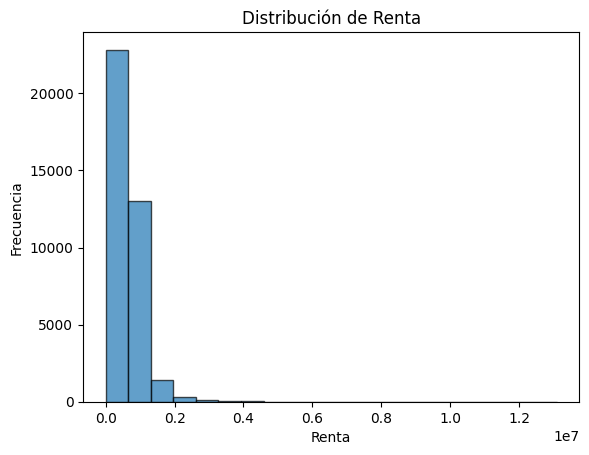

In [12]:
# Gráfico 1: Histograma de Renta
plt.hist(df['Renta'].dropna(), bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribución de Renta')
plt.xlabel('Renta')
plt.ylabel('Frecuencia')
plt.show()

Representa visualmente la cantidad de clientes por región, ayudando a identificar las regiones con mayor o menor cantidad de clientes.

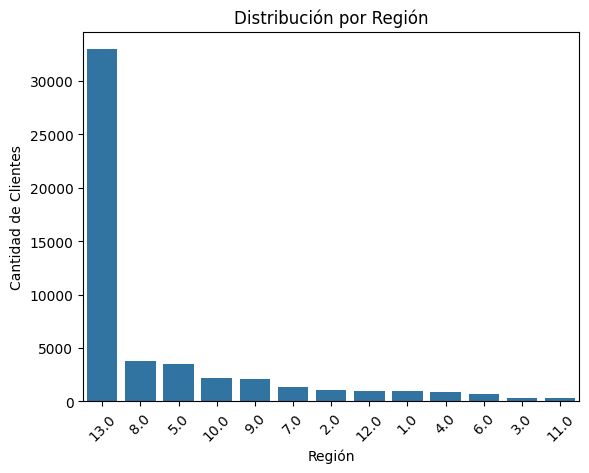

In [13]:
# Gráfico 2: Barras para la distribución por región
sb.countplot(data=df, x='Region', order=df['Region'].value_counts().index)
plt.title('Distribución por Región')
plt.xlabel('Región')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.show()

Ilustra cómo se distribuyen los años de antigüedad de los clientes con una curva de densidad suave, útil para analizar tendencias generales.

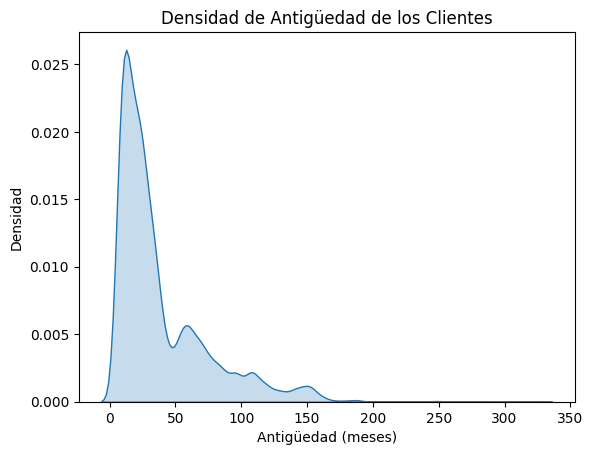

In [14]:
# Gráfico 3: Densidad de Antigüedad
sb.kdeplot(data=df, x='Antiguedad', fill=True)
plt.title('Densidad de Antigüedad de los Clientes')
plt.xlabel('Antigüedad (meses)')
plt.ylabel('Densidad')
plt.show()

Proporciona una visión general de cómo están distribuidas las edades de los clientes en el dataset, permitiendo identificar grupos de edad dominantes

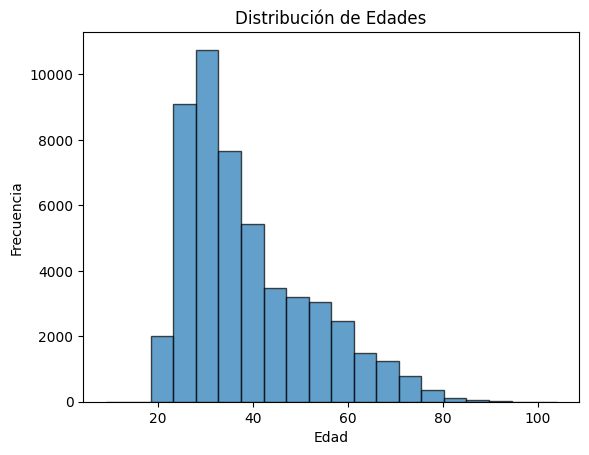

In [15]:
# Histograma de edades
plt.hist(df['Edad'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


Examina la relación entre la edad de los clientes y sus ingresos (Renta), buscando patrones o tendencias.

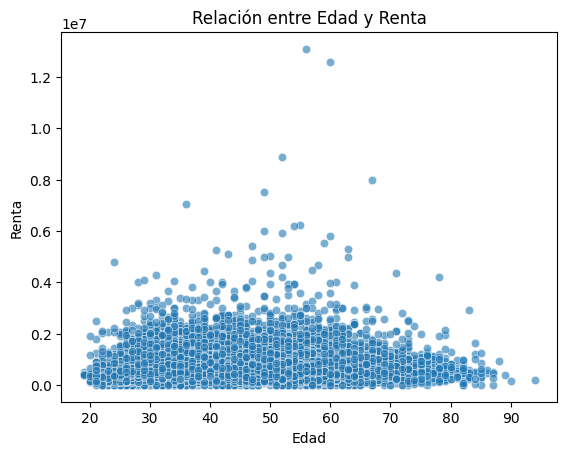

In [16]:
# Gráfico 4: Dispersión entre Edad y Renta
sb.scatterplot(data=df, x='Edad', y='Renta', alpha=0.6)
plt.title('Relación entre Edad y Renta')
plt.xlabel('Edad')
plt.ylabel('Renta')
plt.show()

Muestra la distribución de clientes por género (Sexo), permitiendo analizar si existe algún sesgo en la proporción de géneros.

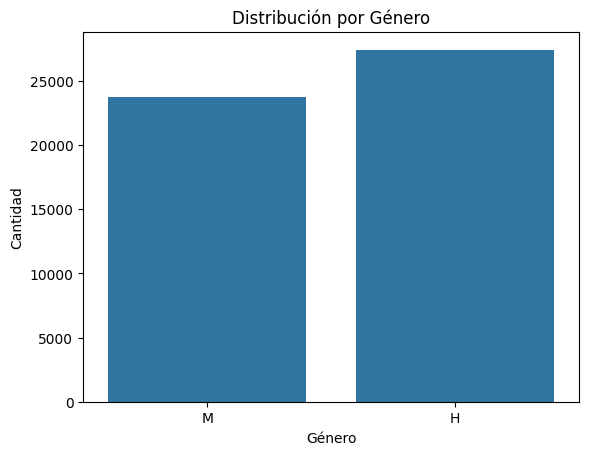

In [17]:

# Gráfico de barras para género
sb.countplot(data=df, x='Sexo')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

Permite comparar la distribución de los ingresos (Renta) entre géneros, ayudando a identificar diferencias significativas.

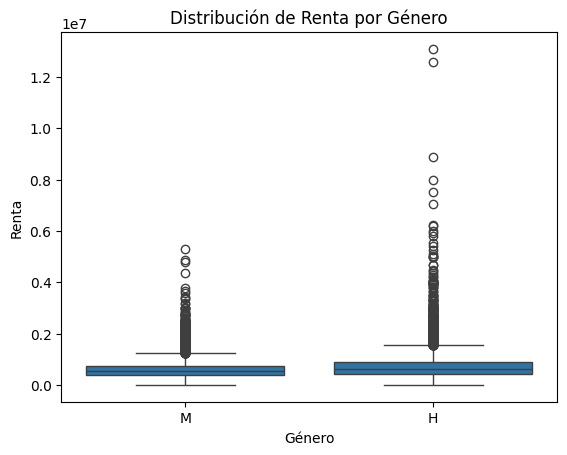

In [18]:
# Gráfico 5: Boxplot de Renta por Género
sb.boxplot(data=df, x='Sexo', y='Renta')
plt.title('Distribución de Renta por Género')
plt.xlabel('Género')
plt.ylabel('Renta')
plt.show()

Indica cuántos clientes utilizan un solo producto (Monoproducto) 

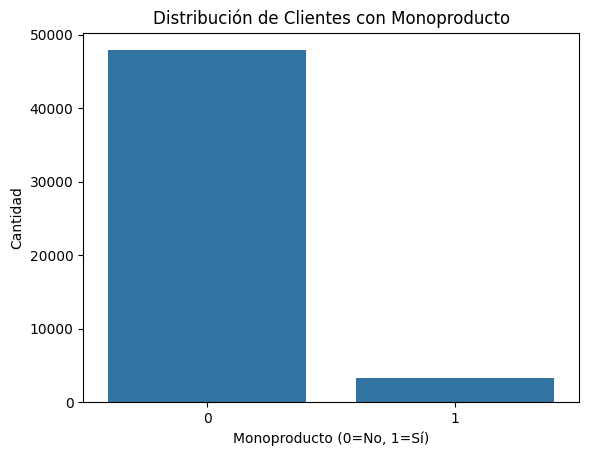

In [19]:
# Gráfico 6: Barras para Monoproducto
sb.countplot(data=df, x='Monoproducto')
plt.title('Distribución de Clientes con Monoproducto')
plt.xlabel('Monoproducto (0=No, 1=Sí)')
plt.ylabel('Cantidad')
plt.show()

Explora cómo los créditos totales se relacionan con la edad de los clientes, buscando patrones de consumo según la etapa de vida.

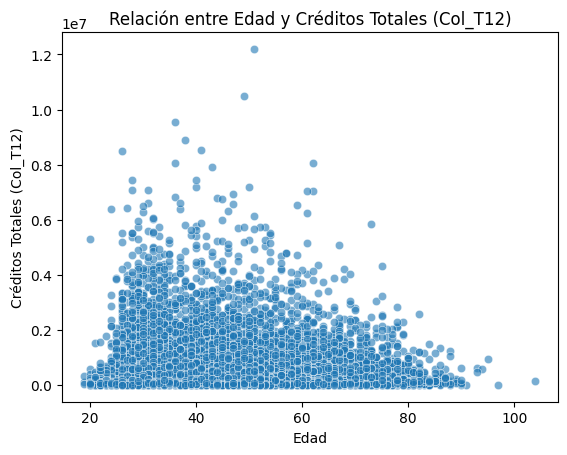

In [20]:
# Gráfico 7: Dispersión entre Col_T12 y Edad
sb.scatterplot(data=df, x='Edad', y='Col_T12', alpha=0.6)
plt.title('Relación entre Edad y Créditos Totales (Col_T12)')
plt.xlabel('Edad')
plt.ylabel('Créditos Totales (Col_T12)')
plt.show()

Finalmente creamos un dataset filtrado por las columnas que nosotros consideramos que utilizaremos a futuro y que son las que realmente nos aportan en los analisis.

In [21]:
# Definir columnas esenciales y relevantes para mantener
columnas_a_mantener = [
    # Esenciales
    'Fac_T12', 'FacAI_T12', 'FacAN_T12', 'FacCCOT_T12', 'FacCCPC_T12',
    'FacCI_T12', 'FacCN_T12', 'PagoNac_T12', 'PagoInt_T12',
    'UsoL1_T12', 'UsoL2_T12', 'UsoLI_T12',
    # Relevantes
    'Region', 'Renta', 'Antiguedad',
    'CUPO_L1','CUPO_MX', 'Adicional', 'Monoproducto', 
    'Dualidad', 'Internauta', 'Txs_T12', 'FlgAct_T12'
]

# Filtrar el dataset para conservar solo las columnas necesarias
df_filtrado = df[columnas_a_mantener]

# Mostrar las nuevas dimensiones del dataset
print("Nuevas dimensiones del dataset:", df_filtrado.shape)

# Verificar columnas restantes
print("Columnas restantes en el dataset filtrado:")
print(df_filtrado.columns)


Nuevas dimensiones del dataset: (51124, 23)
Columnas restantes en el dataset filtrado:
Index(['Fac_T12', 'FacAI_T12', 'FacAN_T12', 'FacCCOT_T12', 'FacCCPC_T12',
       'FacCI_T12', 'FacCN_T12', 'PagoNac_T12', 'PagoInt_T12', 'UsoL1_T12',
       'UsoL2_T12', 'UsoLI_T12', 'Region', 'Renta', 'Antiguedad', 'CUPO_L1',
       'CUPO_MX', 'Adicional', 'Monoproducto', 'Dualidad', 'Internauta',
       'Txs_T12', 'FlgAct_T12'],
      dtype='object')


Hacemos este codigo para conocer los valores nulos que tenemos en nuestras columnas del datasetr filtrado y asi posteriormente trabjar con eso y preparar los datos.

In [22]:
# Identificar valores nulos en el dataset filtrado
valores_nulos = df_filtrado.isnull().sum()
print("\nValores nulos por columna en el dataset filtrado:")
print(valores_nulos[valores_nulos > 0])



Valores nulos por columna en el dataset filtrado:
Fac_T12         8251
FacAI_T12       8251
FacAN_T12       8251
FacCCOT_T12     8251
FacCCPC_T12     8251
FacCI_T12       8251
FacCN_T12       8251
PagoNac_T12     8251
PagoInt_T12     8251
UsoL1_T12       8251
UsoL2_T12       8251
UsoLI_T12       8251
Region            53
Renta          13365
Txs_T12         8251
FlgAct_T12      8251
dtype: int64


# FASE 3: PREPARACIÓN DE LOS DATOS

En esta fase, trabajaremos en la limpieza y transformación del dataset para asegurar que esté listo para análisis y modelado. Esto incluye:

1. Eliminar columnas con datos incompletos o irrelevantes.

2. Manejar valores nulos para evitar sesgos en los resultados.

3. Transformar datos categóricos en formatos numéricos.

4. Detectar y tratar valores atípicos (outliers).

5. Normalizar las variables para mejorar el rendimiento de los modelos.


Identificamos las columnas con valores nulas y mostramos la cantidad.

Usamos la mediana para columnas numéricas como Renta y un valor categórico para Region para evitar eliminar registros.

In [23]:
# Imputación de valores nulos
df_filtrado['Renta'] = df_filtrado['Renta'].fillna(df['Renta'].median())  # Mediana para ingresos
df_filtrado['Region'] = df_filtrado['Region'].fillna('Desconocido')      # Categoría 'Desconocido'


C:\Users\victo\AppData\Local\Temp\ipykernel_10652\376897011.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Renta'] = df_filtrado['Renta'].fillna(df['Renta'].median())  # Mediana para ingresos
C:\Users\victo\AppData\Local\Temp\ipykernel_10652\376897011.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Region'] = df_filtrado['Region'].fillna('Desconocido')      # Categoría 'Desconocido'


Usamos el rango intercuartil (IQR) para eliminarlos los outliers de la columna Renta.

In [24]:
# Eliminar o ajustar outliers en Renta
q1 = df_filtrado['Renta'].quantile(0.25)
q3 = df_filtrado['Renta'].quantile(0.75)
iqr = q3 - q1  # Rango intercuartil
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

df = df[(df['Renta'] >= limite_inferior) & (df['Renta'] <= limite_superior)]


Boxplot para mostrar los datos de Fac_T12 despues de eliminar los outliers.


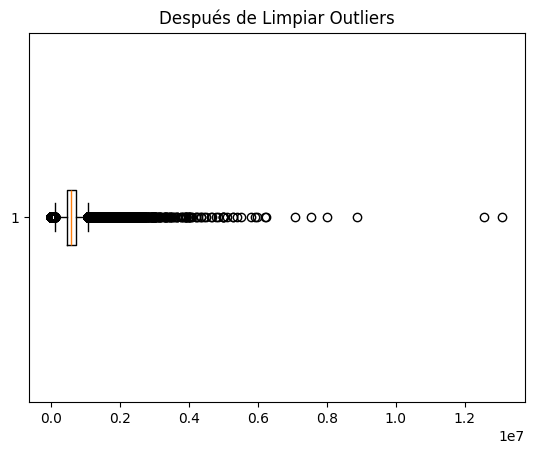

In [25]:
# Después de limpiar outliers
plt.boxplot(df_filtrado['Renta'], vert=False)
plt.title('Después de Limpiar Outliers')
plt.show()

Eliminamos todos los valores nulos que puedan exisitir en Fact_T12

In [26]:
# Eliminar únicamente las filas donde 'Fac_T12' sea nulo
df_filtrado = df_filtrado[df_filtrado['Fac_T12'].notnull()]

Y posterior a eso verificamos si esto funciono,donde el resultado nos inidca que efectivamente ahora hay 0 valores nulos en esta columna.

In [27]:
# Contar valores nulos en 'Fac_T12'
nulos_fact_12 = df_filtrado['Fac_T12'].isnull().sum()
print(f"Número de valores nulos en 'Fac_T12': {nulos_fact_12}")


Número de valores nulos en 'Fac_T12': 0


Transformamos los datos de sexo,pasandolo de letras en este caso: M Y H a 1,2 correspondentiemente y 0 para valores nulos

In [28]:
# Mapear valores de 'Sexo'
sexo_mapping = {'M': 1, 'H': 2}  # 1 para masculino, 2 para femenino

# Transformar los valores y rellenar valores nulos con 0
df['Sexo'] = (
    df['Sexo']
    .map(sexo_mapping)   # Mapear 'M' -> 1 y 'H' -> 2
    .fillna(0)           # Rellenar valores nulos con 0
)

# Verificar los valores únicos después de la transformación
print("Valores únicos en 'Sexo' después de la transformación:")
print(df['Sexo'].unique())


Valores únicos en 'Sexo' después de la transformación:
[2 1]


Por último lo que haremos en esta fase será crear esta matriz de correlacion para saber con que otras variables Fac_t12 tiene una fuerte correlacion.

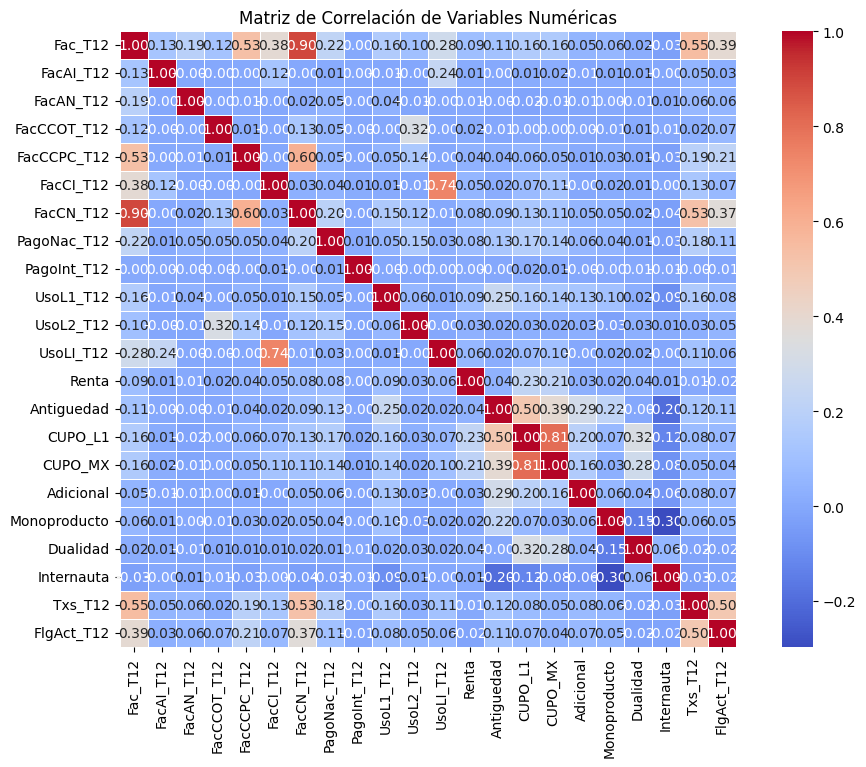

In [29]:
# Seleccionar solo las columnas numéricas del DataFrame filtrado
df_numerico = df_filtrado.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
matriz_correlacion = df_numerico.corr()

# Crear el heatmap para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sb.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Matriz de Correlación de Variables Numéricas")
plt.show()

Una vez ya detectado las columnas que tienen una fuerte correlación con nuestra columna objetivo, procedemos a crear un segundo dataset filtrado con las columnas que utilizaremos y las cuales serán nuestro features.

El nuevo dataset será df_credito

In [30]:
# Definir columnas finales a mantener
columnas_a_mantener = [
    'FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 
    'PagoNac_T12', 'UsoLI_T12', 'Txs_T12', 
    'FlgAct_T12', 'Fac_T12'
]

# Filtrar el dataset para conservar solo las columnas necesarias
df_credito = df[columnas_a_mantener]

# Mostrar las nuevas dimensiones del dataset
print("Nuevas dimensiones del dataset:", df_credito.shape)

# Verificar columnas restantes
print("Columnas restantes en el dataset filtrado:")
print(df_credito.columns)

# Verificar valores nulos en las columnas seleccionadas
valores_nulos = df_credito.isnull().sum()
print("\nValores nulos por columna en el dataset filtrado:")
print(valores_nulos[valores_nulos > 0])

Nuevas dimensiones del dataset: (33219, 8)
Columnas restantes en el dataset filtrado:
Index(['FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 'PagoNac_T12', 'UsoLI_T12',
       'Txs_T12', 'FlgAct_T12', 'Fac_T12'],
      dtype='object')

Valores nulos por columna en el dataset filtrado:
FacCCPC_T12    5626
FacCI_T12      5626
FacCN_T12      5626
PagoNac_T12    5626
UsoLI_T12      5626
Txs_T12        5626
FlgAct_T12     5626
Fac_T12        5626
dtype: int64


Procederemos a borrar los valores nulos de cada columna

In [31]:
# Eliminar filas con valores nulos en las columnas seleccionadas
df_credito = df_credito.dropna(subset=columnas_a_mantener)

print("Nulos eliminados. Total de filas restantes:", len(df_credito))


Nulos eliminados. Total de filas restantes: 27593


Todas nuestras variables se encuentran en tipo float64, procederemos a cambiarla a formato entero para poder trabajarlas de mejor manera al futuro.

In [32]:
# Eliminar espacios en los nombres de las columnas
df_credito.columns = df_credito.columns.str.strip()

# Lista de columnas que deseas convertir a tipo numérico
columnas_a_convertir = [
    'FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 'PagoNac_T12', 
    'UsoLI_T12', 'Txs_T12', 'FlgAct_T12', 'Fac_T12'
]

# Convertir cada columna a tipo numérico y luego a entero
for columna in columnas_a_convertir:
    if columna in df_credito.columns:  # Asegurar que la columna existe
        # Convertir a numérico y manejar valores no válidos
        df_credito[columna] = pd.to_numeric(df_credito[columna], errors='coerce')
        # Rellenar valores NaN con 0 antes de convertir a entero
        df_credito[columna] = df_credito[columna].fillna(0).astype(int)

# Verificar los tipos de datos después de la conversión
print(df_credito.dtypes)


FacCCPC_T12    int64
FacCI_T12      int64
FacCN_T12      int64
PagoNac_T12    int64
UsoLI_T12      int64
Txs_T12        int64
FlgAct_T12     int64
Fac_T12        int64
dtype: object


Verificamos nuevamente el tipo de dato de nuestras variables

In [33]:
df_credito.dtypes

FacCCPC_T12    int64
FacCI_T12      int64
FacCN_T12      int64
PagoNac_T12    int64
UsoLI_T12      int64
Txs_T12        int64
FlgAct_T12     int64
Fac_T12        int64
dtype: object

Entonces estos serian nuestros features y nuestro target

In [34]:
features = [    'FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 
    'PagoNac_T12', 'UsoLI_T12', 'Txs_T12', 
    'FlgAct_T12']
target = 'Fac_T12'

## FASES 5 Y 6: ENTRENAMIENTO Y EVALUACIÓN DE MODELOS

MODELOS DE REGRESIÓN:

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Separar features y target
features = ['FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 
            'PagoNac_T12', 'UsoLI_T12', 'Txs_T12', 
            'FlgAct_T12']
target = 'Fac_T12'

X = df_credito[features]
y = df_credito[target]

##### MODELO 1: REGRESIÓN LINEAL

Este modelo demuestra un excelente desempeño tanto en el conjunto de entrenamiento (R² = 0.93) como en el conjunto de prueba (R² = 0.93), lo que indica que captura de manera efectiva la relación entre las variables predictoras y la variable objetivo. Los errores son razonables, con valores similares para los conjuntos de entrenamiento y prueba, lo que sugiere que el modelo generaliza bien.

Se realizo pruebas con cross validation y Ridge Regression (Con Regularización y Escalado), pero dieron resultados variados muy minimos y aún así el modelo éstandar mostró mejores resultados.


Validación Cruzada: Regresión Lineal
R² promedio: 0.9354
MSE promedio: 855293089.8229
MAE promedio: 9893.9887

Regresión Lineal:
R² Set de Entrenamiento: 0.9373
R² Set de Prueba: 0.9311
MSE Set de Entrenamiento: 863644655.3993
MSE Set de Prueba: 797702678.7712
MAE Set de Entrenamiento: 9813.0711
MAE Set de Prueba: 10024.5873

Ridge Regression:
Mejor alpha: 1.0
R² promedio (Validación Cruzada): 0.9355

Ridge Regression (Con Regularización y Escalado):
R² Set de Entrenamiento: 0.9373
R² Set de Prueba: 0.9311
MSE Set de Entrenamiento: 863644702.9450
MSE Set de Prueba: 797689009.8530
MAE Set de Entrenamiento: 9813.5164
MAE Set de Prueba: 10024.8436


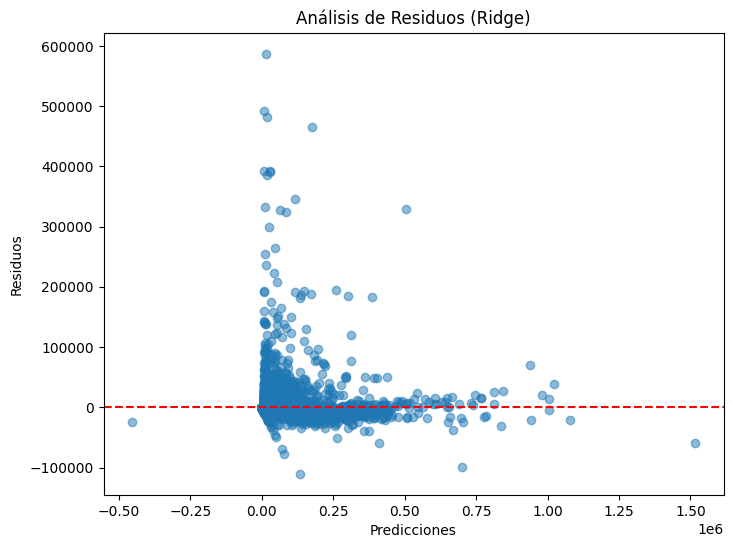

In [36]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Modelo de Regresión Lineal con Validación Cruzada
modelo_lr = LinearRegression()
cv_scores = cross_val_score(modelo_lr, X, y, cv=5, scoring='r2')
cv_mse = cross_val_score(modelo_lr, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mae = cross_val_score(modelo_lr, X, y, cv=5, scoring='neg_mean_absolute_error')

print("\nValidación Cruzada: Regresión Lineal")
print(f"R² promedio: {np.mean(cv_scores):.4f}")
print(f"MSE promedio: {np.mean(-cv_mse):.4f}")
print(f"MAE promedio: {np.mean(-cv_mae):.4f}")

# Entrenar el modelo de Regresión Lineal
modelo_lr.fit(X_train, y_train)

# Predicciones y Métricas de Regresión Lineal
y_train_pred = modelo_lr.predict(X_train)
y_test_pred = modelo_lr.predict(X_test)

print("\nRegresión Lineal:")
print(f'R² Set de Entrenamiento: {r2_score(y_train, y_train_pred):.4f}')
print(f'R² Set de Prueba: {r2_score(y_test, y_test_pred):.4f}')
print(f'MSE Set de Entrenamiento: {mean_squared_error(y_train, y_train_pred):.4f}')
print(f'MSE Set de Prueba: {mean_squared_error(y_test, y_test_pred):.4f}')
print(f'MAE Set de Entrenamiento: {mean_absolute_error(y_train, y_train_pred):.4f}')
print(f'MAE Set de Prueba: {mean_absolute_error(y_test, y_test_pred):.4f}')

# 2. Regularización con Ridge y GridSearchCV
ridge = Ridge()
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}
ridge_cv = GridSearchCV(ridge, param_grid, scoring='r2', cv=5)
ridge_cv.fit(X_train, y_train)

best_alpha_ridge = ridge_cv.best_params_['alpha']
print("\nRidge Regression:")
print(f"Mejor alpha: {best_alpha_ridge}")
print(f"R² promedio (Validación Cruzada): {ridge_cv.best_score_:.4f}")

# Modelo Ridge con el mejor alpha y escalado
ridge_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=best_alpha_ridge))
ridge_pipeline.fit(X_train, y_train)

# Predicciones y Métricas de Ridge
y_train_pred_ridge = ridge_pipeline.predict(X_train)
y_test_pred_ridge = ridge_pipeline.predict(X_test)

print("\nRidge Regression (Con Regularización y Escalado):")
print(f'R² Set de Entrenamiento: {r2_score(y_train, y_train_pred_ridge):.4f}')
print(f'R² Set de Prueba: {r2_score(y_test, y_test_pred_ridge):.4f}')
print(f'MSE Set de Entrenamiento: {mean_squared_error(y_train, y_train_pred_ridge):.4f}')
print(f'MSE Set de Prueba: {mean_squared_error(y_test, y_test_pred_ridge):.4f}')
print(f'MAE Set de Entrenamiento: {mean_absolute_error(y_train, y_train_pred_ridge):.4f}')
print(f'MAE Set de Prueba: {mean_absolute_error(y_test, y_test_pred_ridge):.4f}')

# 3. Análisis de Residuos
residuos = y_test - y_test_pred_ridge

plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred_ridge, residuos, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Análisis de Residuos (Ridge)")
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()


##### MODELO 2: SUPPORT VECTOR MACHINE REGRESIÓN (SVR)

Este modelo no logra capturar adecuadamente la relación entre las variables predictoras y la variable objetivo, como lo evidencia el bajo R² muy bajo tanto en el conjunto de entrenamiento como en el de prueba. Los errores son significativamente altos, lo que indica que este modelo no es adecuado para este conjunto de datos.

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import numpy as np

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo SVR con hiperparámetros ajustados manualmente
modelo_svr = SVR(C=10, epsilon=0.2, kernel='rbf')  # Hiperparámetros elegidos manualmente
modelo_svr.fit(X_train_scaled, y_train)

# Validación cruzada
cv_scores = cross_val_score(modelo_svr, X_train_scaled, y_train, cv=5, scoring='r2')

print("\nValidación Cruzada: SVR")
print(f"R² promedio: {np.mean(cv_scores):.4f}")

# Predicciones finales
y_train_pred = modelo_svr.predict(X_train_scaled)
y_test_pred = modelo_svr.predict(X_test_scaled)

# Métricas finales
print("\nModelo SVR:")
print(f'R² Set de Entrenamiento: {r2_score(y_train, y_train_pred):.4f}')
print(f'R² Set de Prueba: {r2_score(y_test, y_test_pred):.4f}')
print(f'MSE Set de Entrenamiento: {mean_squared_error(y_train, y_train_pred):.4f}')
print(f'MSE Set de Prueba: {mean_squared_error(y_test, y_test_pred):.4f}')
print(f'MAE Set de Entrenamiento: {mean_absolute_error(y_train, y_train_pred):.4f}')
print(f'MAE Set de Prueba: {mean_absolute_error(y_test, y_test_pred):.4f}')



Validación Cruzada: SVR
R² promedio: 0.0239

Modelo SVR:
R² Set de Entrenamiento: 0.0574
R² Set de Prueba: 0.0697
MSE Set de Entrenamiento: 12975278912.1281
MSE Set de Prueba: 10771829431.5831
MAE Set de Entrenamiento: 44262.9167
MAE Set de Prueba: 44106.7064


##### MODELO 3: ÁRBOL DE DESICIÓN REGRESIÓN

El modelo tiene un R² = 0.91 en el conjunto de entrenamiento, lo que indica un sobreajuste extremo, y un R² = 0.90 en el conjunto de prueba, que es bueno pero inferior al de la regresión lineal. Esto, junto con la diferencia significativa en el error cuadrático medio entre los conjuntos de entrenamiento y prueba, sugiere que el modelo no generaliza tan bien como el modelo lineal.

In [38]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Separar features y target
features = ['FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 
            'PagoNac_T12', 'UsoLI_T12', 'Txs_T12', 
            'FlgAct_T12']
target = 'Fac_T12'

X = df_credito[features]
y = df_credito[target]

# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Árbol de Decisión con hiperparámetros ajustados
modelo_dt = DecisionTreeRegressor(max_depth=10, min_samples_split=20, min_samples_leaf=10, random_state=42)
modelo_dt.fit(X_train, y_train)

# Validación cruzada
cv_scores = cross_val_score(modelo_dt, X_train, y_train, cv=5, scoring='r2')

print("\nValidación Cruzada: Árbol de Decisión")
print(f"R² promedio: {np.mean(cv_scores):.4f}")

# Predicciones finales
y_train_pred = modelo_dt.predict(X_train)
y_test_pred = modelo_dt.predict(X_test)

# Métricas finales
print("\nModelo: Árbol de Decisión")
print(f'R² Set de Entrenamiento: {r2_score(y_train, y_train_pred):.4f}')
print(f'R² Set de Prueba: {r2_score(y_test, y_test_pred):.4f}')
print(f'MSE Set de Entrenamiento: {mean_squared_error(y_train, y_train_pred):.4f}')
print(f'MSE Set de Prueba: {mean_squared_error(y_test, y_test_pred):.4f}')
print(f'MAE Set de Entrenamiento: {mean_absolute_error(y_train, y_train_pred):.4f}')
print(f'MAE Set de Prueba: {mean_absolute_error(y_test, y_test_pred):.4f}')



Validación Cruzada: Árbol de Decisión
R² promedio: 0.8928

Modelo: Árbol de Decisión
R² Set de Entrenamiento: 0.9138
R² Set de Prueba: 0.9042
MSE Set de Entrenamiento: 1186274727.0529
MSE Set de Prueba: 1109588682.3910
MAE Set de Entrenamiento: 8446.7568
MAE Set de Prueba: 9475.8623


##### CONCLUSIONES MODELOS DE REGRESIÓN
Interpretación:
Entre los tres modelos evaluados, la Regresión Lineal mostró el mejor desempeño general. Esto se debe a su capacidad para capturar la relación entre las variables predictoras y la variable objetivo, logrando un sólido equilibrio entre el desempeño en el conjunto de entrenamiento (R² = 0.93) y el conjunto de prueba (R² = 0.93). Además, los errores (MSE y MAE) son razonables y consistentes, lo que indica que el modelo generaliza bien y no presenta problemas significativos de sobreajuste.

En contraste:

SVR mostró un desempeño muy deficiente (R² muy bajo) y errores extremadamente altos, lo que sugiere que este modelo no es adecuado para el problema con la configuración actual.
Árbol de Decisión tuvo un buen desempeño en el conjunto de prueba (R² = 0.91), pero presentó un sobreajuste significativo en el conjunto de entrenamiento (R² = 0.90), lo que lo hace menos confiable en comparación con la regresión lineal.

#### MODELOS DE CLASIFICACIÓN

MODELO 1: GRADIENT BOOSTING CLASIFICACIÓN

Logró una precisión de 34% y un F1 Score de 31%, reflejando un rendimiento moderado con un balance aceptable entre precisión y recall. Sin embargo, su tiempo de entrenamiento fue extremadamente alto (153 segundos), lo que limita su practicidad en escenarios con grandes volúmenes de datos o necesidad de iteraciones rápidas.

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import time

# Definir las características y el objetivo
features = ['FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 
            'PagoNac_T12', 'UsoLI_T12', 'Txs_T12', 
            'FlgAct_T12']
target = 'Fac_T12'

# Trabajar con una muestra para pruebas iniciales
df_sample = df_credito.sample(frac=0.1, random_state=42)  # Usa el 10% de los datos
X = df_sample[features]
y = df_sample[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo con ajustes
gbc = GradientBoostingClassifier(n_estimators=50, max_depth=3, random_state=42)

# Medir el tiempo de entrenamiento
start_time = time.time()
gbc.fit(X_train, y_train)
end_time = time.time()
print("Tiempo de entrenamiento Gradient Boosting:", end_time - start_time, "segundos")

# Realizar predicciones
y_pred = gbc.predict(X_test)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Imprimir las métricas
print('Métricas del Gradient Boosting Classifier:')
print('Accuracy:', accuracy)
print('F1 Score:', f1score)
print('Precision:', precision)
print('Recall:', recall)

Tiempo de entrenamiento Gradient Boosting: 152.78010869026184 segundos
Métricas del Gradient Boosting Classifier:
Accuracy: 0.34601449275362317
F1 Score: 0.31580395699586106
Precision: 0.291366595207789
Recall: 0.34601449275362317


c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


MODELO 2: REGRESIÓN LOGÍSTICA

Con un accuracy de 36% y un F1 Score de 29%, mostró el rendimiento más bajo, particularmente en precisión (25%). Aunque eficiente en tiempo de entrenamiento (23 segundos), no alcanzó el nivel de desempeño de los otros modelos.

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import time

# Definir las características y el objetivo
features = ['FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 
            'PagoNac_T12', 'UsoLI_T12', 'Txs_T12', 
            'FlgAct_T12']
target = 'Fac_T12'

# Trabajar con una muestra para pruebas iniciales
df_sample = df_credito.sample(frac=0.1, random_state=42)  # Usa el 10% de los datos
X = df_sample[features]
y = df_sample[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializar el modelo con ajustes
lr = LogisticRegression(solver='saga', max_iter=200, random_state=42)

# Medir el tiempo de entrenamiento
start_time = time.time()
lr.fit(X_train_scaled, y_train)
end_time = time.time()
print("Tiempo de entrenamiento Logistic Regression:", end_time - start_time, "segundos")

# Realizar predicciones
y_pred = lr.predict(X_test_scaled)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Imprimir las métricas
print('Métricas de Logistic Regression:')
print('Accuracy:', accuracy)
print('F1 Score:', f1score)
print('Precision:', precision)
print('Recall:', recall)

Tiempo de entrenamiento Logistic Regression: 20.151328563690186 segundos
Métricas de Logistic Regression:
Accuracy: 0.3605072463768116
F1 Score: 0.2958389362020021
Precision: 0.25084245464680244
Recall: 0.3605072463768116


c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


MODELO 3: RANDOM FOREST CLASIFICACIÓN

El mejor rendimiento general, con una precisión de 36%, un F1 Score de 36% y el mejor balance entre métricas. Su tiempo de entrenamiento extremadamente bajo (0.54 segundos) lo hace ideal para este tipo de problemas, combinando eficacia y eficiencia.

In [41]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import pandas as pd
import time

# Definir las características y el objetivo
features = ['FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 
            'PagoNac_T12', 'UsoLI_T12', 'Txs_T12', 
            'FlgAct_T12']
target = 'Fac_T12'

# Trabajar con una muestra del dataset
df_sample = df_credito.sample(frac=0.1, random_state=42)  # Usa el 10% de los datos
X = df_sample[features]
y = df_sample[target]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir el modelo base
rfc = RandomForestClassifier(random_state=42)

# Configurar el rango de hiperparámetros para GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Inicializar GridSearchCV
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, 
                           scoring='f1_weighted', cv=3, n_jobs=-1, verbose=2)

# Medir el tiempo de búsqueda
start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()
print("Tiempo de búsqueda de hiperparámetros:", end_time - start_time, "segundos")

# Mejor modelo encontrado
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros:", grid_search.best_params_)

# Evaluar el modelo optimizado
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
f1score = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Imprimir las métricas del modelo optimizado
print('Métricas del Random Forest Classifier (Optimizado):')
print('Accuracy:', accuracy)
print('F1 Score:', f1score)
print('Precision:', precision)
print('Recall:', recall)

c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Tiempo de búsqueda de hiperparámetros: 166.14375925064087 segundos
Mejores hiperparámetros: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Métricas del Random Forest Classifier (Optimizado):
Accuracy: 0.3713768115942029
F1 Score: 0.36712962962962964
Precision: 0.36556461352657005
Recall: 0.3713768115942029


c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\victo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##### CONCLUSIONES MODELOS DE CLASIFICACIÓN:

El modelo Random Forest es la mejor opción con un Accuracy del 37.1% y el mejor F1 Score (0.37), destacando en precisión y recall frente a los demás. Aunque Gradient Boosting tiene métricas cercanas, su tiempo de entrenamiento más alto lo hace menos eficiente. Logistic Regression, aunque rápido, es el de menor desempeño global. 

En conjunto, Random Forest combina efectividad y eficiencia, posicionándose como la mejor solución.

## FASE 6: DESPLIEGUE

En esta fase realizaremos un prediccion con datos ficticos los cuales los ingresaremos manualmente a nuestros features con el mejor modelo que dio resultado:

En este caso utilizaremos un modelo de regresion debido a que nuestra columna target es un valor continuo.

El mejor modelo que entregó mejores resultados fue regresion lineal.

In [42]:
valores_ficticios = {
    'FacCCPC_T12': 5000,
    'FacCI_T12': 3000,
    'FacCN_T12': 10000,
    'PagoNac_T12': 8000,
    'UsoLI_T12': 1500,
    'Txs_T12': 25,
    'FlgAct_T12': 6
}

## Convertir los valores a un DataFrame con la misma estructura que X
df_valores_ficticios = pd.DataFrame([valores_ficticios])

## Realizar la predicción
prediccion = modelo_lr.predict(df_valores_ficticios)

## Mostrar el resultado
print(f"Predicción del target 'Fac_T12' con valores ficticios: {prediccion[0]:.2f}")

Predicción del target 'Fac_T12' con valores ficticios: 85107.98


Instalamos flask para el desarrollo de página web predictiva

In [43]:
pip install flask



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


##### PASOS PARA INGRESAR A LA PÁGINA:

DESDE LA CONSOLA ABRIMOS LA CARPETA DE LA PAGINA: cd '.\monopoly\WEB APP\' \

UNA VEZ DENTRO DE LA CARPETA EJECUTAMOS: python app.py \

SE EJECUTARA LA PAGINA Y DEBEMOS INGRESAR EN NUESTRO NAVEGADOR A LA URL: http://127.0.0.1:5000 \

EN ESA PÁGINA PODEMOS INGRESAR LA INFORMACIÓN QUE QUISIERAMOS PARA PREDECIR EL CALCULO DEL MONTO FACTURADO \

## FASE 7: MODELOS NO SUPERVISADOS

Vamos a implementar e evaluar 3 modelos no supervisados:

1. Clustering Jerárquico
2. K-Means
3. DBSCAN

Primero definimos nuestros features para los modelos y estandarizamos los datos.

In [44]:
from sklearn.preprocessing import StandardScaler

# Definir las features
features = ['FacCCPC_T12', 'FacCI_T12', 'FacCN_T12', 
            'PagoNac_T12', 'UsoLI_T12', 'Txs_T12', 
            'FlgAct_T12']

# Extraer las columnas de interés
data = df_credito[features]

# Estandarizar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#### MODELO 1: CLUSTERING JERÁRQUICO

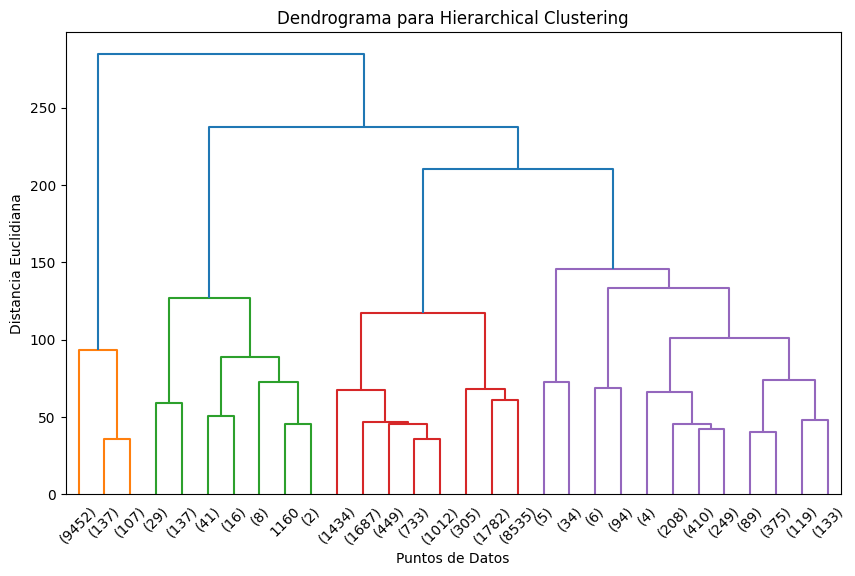

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Calcular el linkage
linkage_matrix = linkage(data_scaled, method='ward')  # 'ward' minimiza la varianza en los clusters

# Graficar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)  # Visualizar los últimos 30 clusters
plt.title('Dendrograma para Hierarchical Clustering')
plt.xlabel('Puntos de Datos')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Definir el número de clusters (ajusta según el dendrograma)
n_clusters = 5

# Aplicar Agglomerative Clustering
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
hierarchical_labels = hierarchical_clustering.fit_predict(data_scaled)

# Agregar las etiquetas al DataFrame original
df_credito['Hierarchical_Cluster'] = hierarchical_labels

# Ver distribución de puntos por cluster
print("\nDistribución de puntos por cluster (Hierarchical Clustering):\n", df_credito['Hierarchical_Cluster'].value_counts())

# Calcular el Silhouette Score
silhouette_hierarchical = silhouette_score(data_scaled, hierarchical_labels)
print("\nSilhouette Score (Hierarchical Clustering):", silhouette_hierarchical)



Distribución de puntos por cluster (Hierarchical Clustering):
 Hierarchical_Cluster
1    15937
3     9696
0     1687
2      234
4       39
Name: count, dtype: int64

Silhouette Score (Hierarchical Clustering): 0.5558553519014504


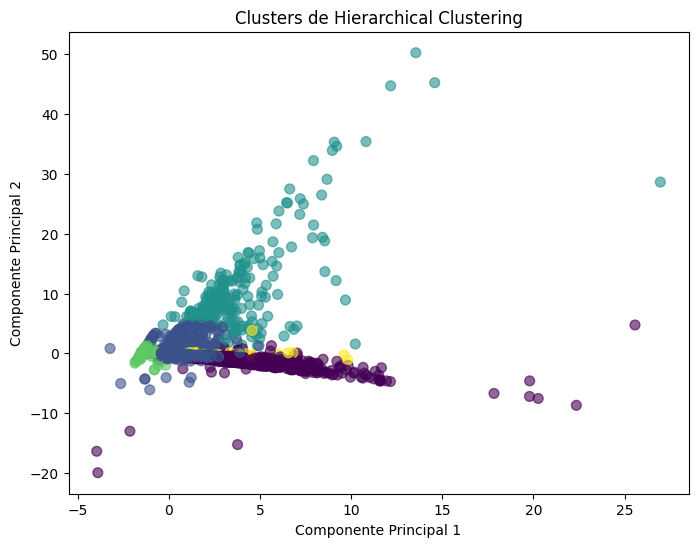

In [47]:
from sklearn.decomposition import PCA

# Reducir las dimensiones con PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Graficar los clusters jerárquicos
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=hierarchical_labels, cmap='viridis', s=50, alpha=0.6)
plt.title('Clusters de Hierarchical Clustering')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

Primero creamos un dendrograma para visualizar la estructura jerárquica de los datos y definir el número óptimo de clusters según la distancia de corte.

Luego definimos 5 clusters basándonos en el dendrograma y analizamos la distribución de puntos:

Cluster 1: 15,937 puntos (el más grande). \
Cluster 3: 9,696 puntos. \
Cluster 0: 1,687 puntos. \
Cluster 2: 234 puntos. \
Cluster 4: 39 puntos (el más pequeño). \

Desplegamos el Silhouette Score que nos dió 0.604, este puntaje indica que los clusters están bien definidos, aunque no tan cohesionados y separados.

Por último graficamos los clusters jerárquicos en 2D usando PCA para reducir la dimensionalidad, visualizando cómo se agrupan los datos en el espacio reducido.

#### MODEO 2: K-MEANS

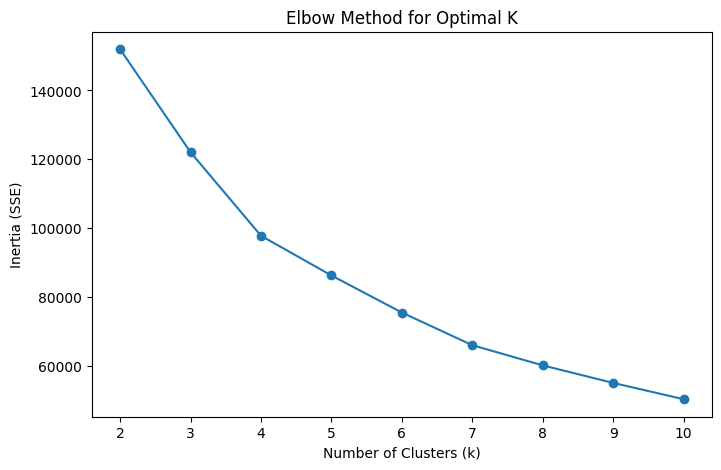

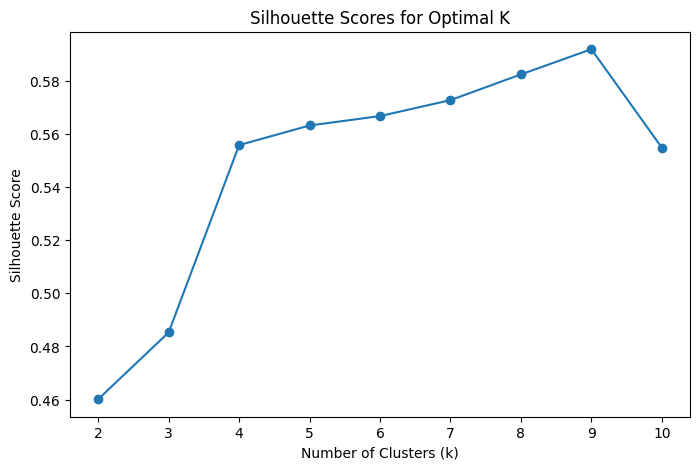

Optimal K based on Silhouette: 9

K-Means Results (Optimal k):
Optimal k: 9
Silhouette Score (K-Means): 0.5919175597517459
Centros de los Clusters (K-Means):
 [[-3.22306881e-01 -8.74759820e-02 -5.42958834e-01 -2.34374728e-01
  -8.79411097e-02 -6.88700603e-01 -1.36260967e+00]
 [-8.98743551e-02 -5.52636655e-02 -9.64204400e-02 -7.97489199e-02
  -6.04060084e-02  3.29397785e-03  7.33767240e-01]
 [-1.20400983e-01 -3.53841314e-02 -2.75056559e-02  4.44175720e+00
  -4.28762685e-02 -9.05427513e-02 -3.89785963e-02]
 [ 2.16580510e+00 -6.62093688e-02  1.98960692e+00  1.72162752e-01
  -9.05358942e-02  6.02467846e-01  7.33767240e-01]
 [ 1.03116126e+01  1.45571051e-01  6.41747825e+00  5.12192019e-01
   1.70510591e-01  7.88527492e-01  7.33767240e-01]
 [ 1.12236000e-01 -4.06152834e-02  1.32400147e+00  4.24949088e-01
  -6.70205645e-02  2.36571664e+00  7.33767240e-01]
 [-2.96392072e-01 -8.74759820e-02  6.90234239e-02  2.42574779e+01
  -9.13532282e-02 -2.37947884e-01 -6.20825306e-03]
 [-4.28223646e-02  5.2

In [48]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Determinar el k óptimo usando Elbow y Silhouette
k_values = range(2, 11)
inertia = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=300)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Método del Codo (Elbow)
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.show()

# Puntaje de Silhouette
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Determinar el k óptimo basado en Silhouette
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]
print("Optimal K based on Silhouette:", optimal_k)

# Aplicar K-Means con el k óptimo
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Agregar las etiquetas al dataframe original
df_credito['KMeans_Cluster'] = kmeans_labels

# Obtener centros y distribución
kmeans_centers = kmeans.cluster_centers_
silhouette_kmeans = silhouette_score(data_scaled, kmeans_labels)

print("\nK-Means Results (Optimal k):")
print("Optimal k:", optimal_k)
print("Silhouette Score (K-Means):", silhouette_kmeans)
print("Centros de los Clusters (K-Means):\n", kmeans_centers)
print("\nDistribución de puntos por cluster (K-Means):\n", df_credito['KMeans_Cluster'].value_counts())


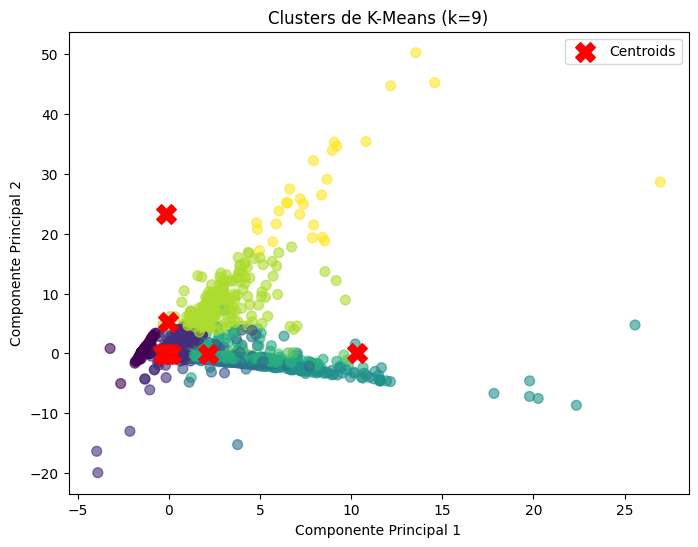

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir dimensiones con PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Graficar los clusters de K-Means
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Clusters de K-Means (k=9)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.show()


Para el cálculo del k óptimo realizamos lo siguiente:

Primero utilizamos Método del Codo (Elbow) para ver en que punto donde la mejora en SSE disminuye significativamente.

Segundo evaluamos la calidad del clustering calculando el Silhouette Score para cada valor de y seleccionamos el k con el puntaje más alto como óptimo.

Resultados: \
Optimal k = 9: Esto sugiere que 9 clusters segmentan mejor los datos según su estructura interna. 

Silhouette Score = 0.591: \
Indica que los clusters están razonablemente bien definidos, con buena separación y cohesión. \
Aunque no es un puntaje perfecto, es un valor sólido que demuestra que los grupos tienen sentido en el contexto de los datos.

Resumen de los resultados de los clusters y la relacion con las columnas: \
Los clusters 0, 3, 4, 5, y 7 representan usuarios activos con diferentes patrones de gasto y uso de crédito. \
Los clusters 1, 6, y 8 incluyen usuarios menos activos o inactivos, algunos con alta actividad en pagos (cluster 8) pero pocas transacciones. \
El cluster 7 se destaca como un grupo de clientes premium, con altos montos en compras internacionales y deuda en línea internacional.

#### MODELO 3: DBSCAN

In [50]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd

# Ajustar parámetros de DBSCAN
eps_values = [1.2, 1.5, 1.8]  # Explorar diferentes valores de eps
min_samples_values = [3, 5, 7]  # Explorar diferentes valores de min_samples

best_eps, best_min_samples, best_silhouette = None, None, -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(data_scaled)
        
        # Evaluar Silhouette solo si hay más de un cluster
        if len(set(dbscan_labels)) > 1:
            silhouette = silhouette_score(data_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
            if silhouette > best_silhouette:
                best_eps, best_min_samples, best_silhouette = eps, min_samples, silhouette

print("Mejores parámetros para DBSCAN:")
print("eps:", best_eps)
print("min_samples:", best_min_samples)
print("Silhouette Score:", best_silhouette)

# Aplicar DBSCAN con los mejores parámetros
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Agregar etiquetas al dataframe
df_credito['DBSCAN_Cluster'] = dbscan_labels

# Ver resultados
print("\nDistribución de puntos por cluster (DBSCAN):\n", pd.Series(dbscan_labels).value_counts())

Mejores parámetros para DBSCAN:
eps: 1.2
min_samples: 7
Silhouette Score: 0.52127634803594

Distribución de puntos por cluster (DBSCAN):
  0    17475
 1     9636
-1      456
 2       16
 3       10
Name: count, dtype: int64


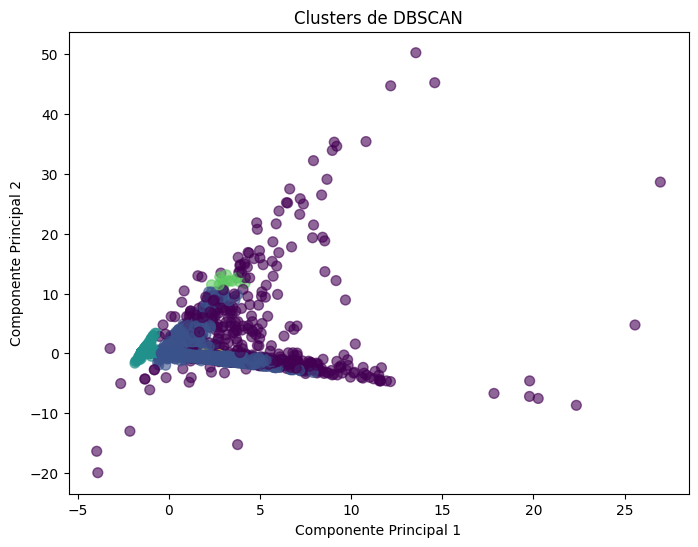

In [51]:
# Graficar los clusters de DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50, alpha=0.6)
plt.title('Clusters de DBSCAN')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()


Realizamos una exploración de Parámetros: \
Ajustamos los valores de eps (radio de vecindad) y min_samples (mínimo de puntos para formar un cluster) a traves de un array para encontrar la mejor configuración. \
Luego evaluamos la calidad de los clusters con Silhouette Score, considerando únicamente los puntos que no son ruido (-1).


Interpretación de los Resultados

Mejores parámetros: \
eps = 1.2 y min_samples = 7 generaron los clusters más consistentes. \
Silhouette Score (0.521):

Un puntaje moderado que sugiere clusters aceptables pero menos definidos en comparación con K-Means.

Distribución de puntos: \
Los clusters 0 y 1 agrupan la mayoría de los puntos (17,410 y 9,636), mientras que los clusters 2 y 3 son muy pequeños. \
456 puntos fueron marcados como ruido (-1), posiblemente por ser outliers o no cumplir con la densidad requerida.

## CONCLUSIONES FASE 7:

##### Comparación entre K-Means, DBSCAN y Clustering Jerárquico
Calidad del clustering:

K-Means es la opción más adecuada para segmentar estos datos gracias a su Silhouette Score más alto (0.591) y clusters bien definidos. \
El Clustering Jerárquico tiene un puntaje intermedio (0.555) y ofrece una representación visual clara de la estructura jerárquica de los datos, lo que lo hace útil como herramienta exploratoria. \
DBSCAN obtuvo el puntaje más bajo (0.521) y es útil principalmente para identificar outliers o clusters densos.


##### Distribución:

K-Means generó 9 clusters relativamente uniformes. \
Clustering Jerárquico, con 5 clusters, mostró una distribución más compacta, con algunos clusters pequeños y otros muy grandes. \
DBSCAN identificó 4 clusters principales y detectó 529 puntos como ruido (-1).


##### Aplicación:

K-Means: Ideal para segmentar datos con estructura clara y regular. \
Clustering Jerárquico: Útil para explorar la jerarquía de los datos y entender relaciones entre clusters. \
DBSCAN: Destacado para detectar outliers y clusters de forma irregular o densidad variable. \


##### Conclusión
K-Means sigue siendo la opción más adecuada para segmentar estos datos, ya que proporciona clusters bien definidos y consistentes, con un puntaje de Silhouette más alto (0.591), facilitando la interpretación y aplicación práctica de los resultados.

El Clustering Jerárquico complementa este análisis al ofrecer una visión jerárquica de las relaciones entre clusters, con un puntaje sólido de 
0.555 que respalda la calidad de los grupos formados. Este modelo puede ser útil para entender la estructura de los datos antes de decidir el número óptimo de clusters.

Por otro lado, DBSCAN, aunque menos efectivo en cohesión y separación, aporta valor al identificar outliers (456 puntos como ruido) y patrones densos en los datos. Este modelo es recomendable como un análisis complementario para detectar comportamientos atípicos o explorar patrones no evidentes.

En conjunto, los tres modelos ofrecen diferentes perspectivas del dataset, y su combinación permite un análisis más robusto y detallado.